In [16]:
import sklearn.datasets as d
import sklearn.preprocessing as pp
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as mt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [17]:
diab = d.load_diabetes()
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
data = pd.DataFrame(diab.data, columns = diab.feature_names)

In [19]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [20]:
X = pd.DataFrame(data["bmi"])    # 그림을 그리기 위해 독립 변수 1개만 함
y = diab.target
X.head()

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [22]:
X.describe()
# 에서 min, max를 참고할 수 있다.

,bmi
count,4.420000e+02
mean,-8.013951e-16
std,4.761905e-02
min,-9.027530e-02
25%,-3.422907e-02
50%,-7.283766e-03
75%,3.124802e-02
max,1.705552e-01


In [38]:
# xx = np.linspace(3, 9)[:, np.newaxis]
xx = np.linspace(X.min() - 0.01, X.max() + 0.01)    # min, max 리턴값 자체가 Series(2차원)임.

In [39]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [40]:
lr = lm.LinearRegression()

In [49]:
reg1 = lr.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
r2_score1 = mt.r2_score(y_test, y_pred1)

yy1 = reg1.predict(xx)

In [50]:
# 부풀림
quad = pp.PolynomialFeatures(degree = 2)
X2_train = quad.fit_transform(X_train)

# 학습
reg2 = lr.fit(X2_train, y_train)

# 부풀림
X2_test = quad.fit_transform(X_test)

# 예측
y_pred2 = reg2.predict(X2_test)
r2_score2 = mt.r2_score(y_test, y_pred2)

# 좌표계 생성
xx2 = quad.fit_transform(xx)
yy2 = reg2.predict(xx2)

In [51]:
cubic = pp.PolynomialFeatures(degree = 3)
X3_train = cubic.fit_transform(X_train)
reg3 = lr.fit(X3_train, y_train)

X3_test = cubic.fit_transform(X_test)
y_pred3 = reg3.predict(X3_test)
r2_score3 = mt.r2_score(y_test, y_pred3)

xx3 = cubic.fit_transform(xx)
yy3 = reg3.predict(xx3)

In [52]:
print(r2_score1)
print(r2_score2)
print(r2_score3)

0.18642576043332115
0.17951486207090928
0.16694827651867417


-> 매우 낮네. BMI 독립 변수는 적절하지 않은 것 같군

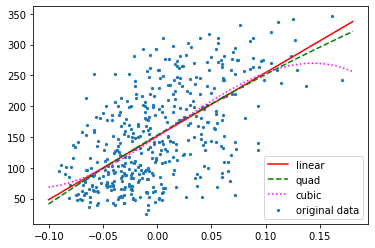

In [44]:
plt.plot(xx, yy1, color="red", linestyle="-", label="linear")
plt.plot(xx, yy2, color="green", linestyle="--", label="quad")
plt.plot(xx, yy3, color="magenta", linestyle=":", label="cubic")
plt.scatter(X, y, label="original data", s=5)
plt.legend()

독립 변수 전체를 넣어보면

In [54]:
X = pd.DataFrame(data)    # 그림을 그리기 위해 독립 변수 1개만 함
y = diab.target
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [55]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 1)

In [56]:
lr = lm.LinearRegression()

In [57]:
reg1 = lr.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
r2_score1 = mt.r2_score(y_test, y_pred1)

In [58]:
quad = pp.PolynomialFeatures(degree = 2)
X2_train = quad.fit_transform(X_train)

reg2 = lr.fit(X2_train, y_train)

X2_test = quad.fit_transform(X_test)

y_pred2 = reg2.predict(X2_test)
r2_score2 = mt.r2_score(y_test, y_pred2)

In [59]:
cubic = pp.PolynomialFeatures(degree = 3)
X3_train = cubic.fit_transform(X_train)
reg3 = lr.fit(X3_train, y_train)

X3_test = cubic.fit_transform(X_test)
y_pred3 = reg3.predict(X3_test)
r2_score3 = mt.r2_score(y_test, y_pred3)

In [60]:
print(r2_score1)
print(r2_score2)
print(r2_score3)

0.4384569849129575
0.21174678022093274
-16350.833639695518
